## Previous set up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("sharks_1950_to_2024.csv")

In [3]:
df = data.copy()

In [4]:
df.head(5)

,year,sex,country,state,time,activity,type,deadly_attack
0,2024,Male,BAHRAIN,Unknown,Night,Fishing,Provoked,N
1,2024,Male,BAHAMAS,Paradise Island,Evening,Swimming,Unprovoked,N
2,2024,Male,AUSTRALIA,South Australia,Afternoon,Surf,Unprovoked,N
3,2024,Male,SOUTH AFRICA,Eastern Cape Province,Night,Fishing,Provoked,N
4,2023,Male,USA,Hawaii,Morning,Surf,Unprovoked,Y


## Group and filtering

### Deadly reality

In [5]:
df["deadly_attack"].value_counts().reset_index()

,deadly_attack,count
0,N,3974
1,Y,697
2,U,446


In [6]:
df["deadly_attack"].value_counts().sum()

5117

In [7]:
percentage_d_a = {}

for ele,value in df["deadly_attack"].value_counts().items():
    percentage_d_a[ele] = (value / len(df["deadly_attack"]) * 100)

In [8]:
percentage_d_a_rounded = {x: round(y, 2) for x,y in percentage_d_a.items()}

In [9]:
percentage_deadly_attack = pd.DataFrame(list(percentage_d_a_rounded.items()), columns=["deadly_attack", "percentage"])

In [10]:
percentage_deadly_attack

,deadly_attack,percentage
0,N,77.66
1,Y,13.62
2,U,8.72


Text(0, 0.5, 'Percentage')

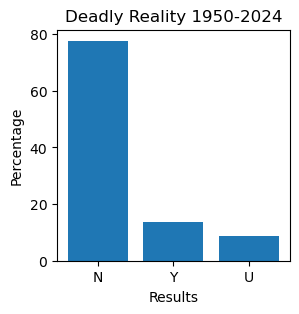

In [11]:
plt.figure(figsize=(3, 3))
plt.bar(percentage_deadly_attack["deadly_attack"], percentage_deadly_attack["percentage"])
plt.title('Deadly Reality 1950-2024')
plt.xlabel('Results')
plt.ylabel('Percentage')

### Deadly activity

In [12]:
deadly_y = df[df["deadly_attack"] == "Y"]

In [13]:
top_5_deadly_activities = deadly_y["activity"].value_counts().reset_index().head(5)

In [14]:
top_5_deadly_activities.head(5)

,activity,count
0,Swimming,200
1,Fishing,116
2,Surf,87
3,Diving,75
4,Unknown,51


Text(0, 0.5, 'Nº of cases')

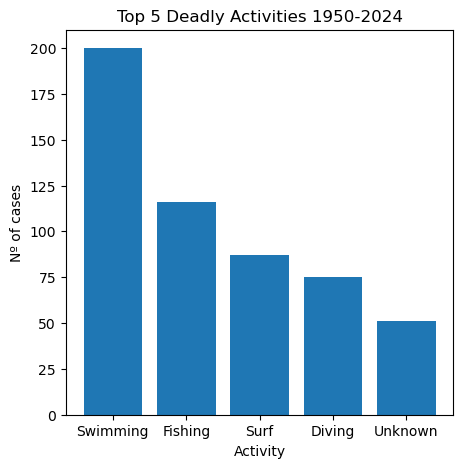

In [15]:
plt.figure(figsize=(5, 5))
plt.bar(top_5_deadly_activities["activity"], top_5_deadly_activities["count"])
plt.title('Top 5 Deadly Activities 1950-2024')
plt.xlabel('Activity')
plt.ylabel('Nº of cases')

### Provoke or unprovoke?

In [16]:
deadly_y["type"].value_counts().reset_index()

,type,count
0,Unprovoked,605
1,Sea Disaster,69
2,Provoked,12
3,Unknown,11


In [17]:
deadly_y["type"].value_counts().sum()

697

In [18]:
percentage_p_un = {}

for ele, value in deadly_y["type"].value_counts().items():
    percentage_p_un[ele] = (value / len(deadly_y["type"]) * 100)

In [19]:
percentage_p_un_rounded = {x: round(y,2) for x,y in percentage_p_un.items()}

In [20]:
percentage_p_un_rounded

{'Unprovoked': 86.8, 'Sea Disaster': 9.9, 'Provoked': 1.72, 'Unknown': 1.58}

In [21]:
percentage_provoked_unprovoked = pd.DataFrame(list(percentage_p_un_rounded.items()), columns =["type","percentage"])

In [22]:
percentage_provoked_unprovoked

,type,percentage
0,Unprovoked,86.80
1,Sea Disaster,9.90
2,Provoked,1.72
3,Unknown,1.58


Text(0, 0.5, 'Percentage')

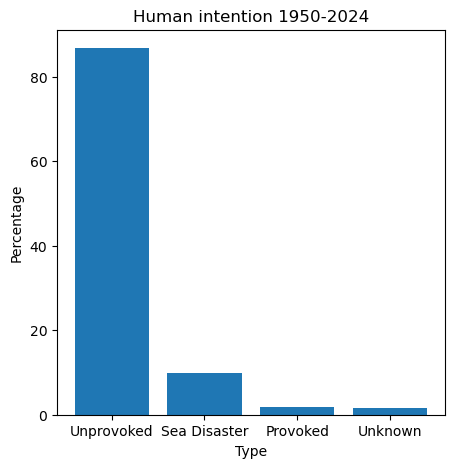

In [23]:
plt.figure(figsize=(5, 5))
plt.bar(percentage_provoked_unprovoked["type"], percentage_provoked_unprovoked["percentage"])
plt.title('Human intention 1950-2024')
plt.xlabel('Type')
plt.ylabel('Percentage')

### Most affected gender

In [24]:
deadly_y["sex"].value_counts().reset_index()

,sex,count
0,Male,552
1,Female,81
2,Unknown,64


In [25]:
deadly_y["sex"].value_counts().sum()

697

In [26]:
percentage_s = {}

for ele, value in deadly_y["sex"].value_counts().items():
    percentage_s[ele] = (value / len(deadly_y["sex"]) * 100)

In [27]:
percentage_s_rounded = {x: round(y,2) for x,y in percentage_s.items()}

In [28]:
percentage_s_rounded

{'Male': 79.2, 'Female': 11.62, 'Unknown': 9.18}

In [29]:
percentage_sex = pd.DataFrame(list(percentage_s_rounded.items()), columns =["gender","percentage"])

In [30]:
percentage_sex

,gender,percentage
0,Male,79.20
1,Female,11.62
2,Unknown,9.18


Text(0, 0.5, 'Percentage')

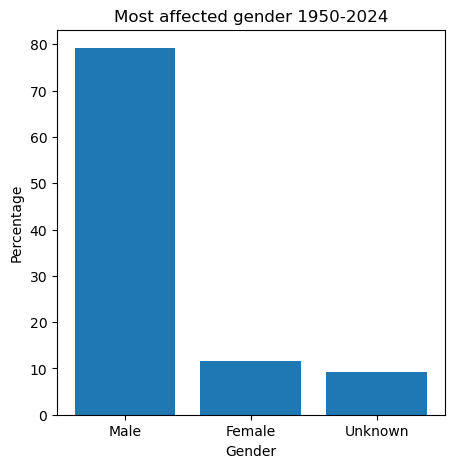

In [31]:
plt.figure(figsize=(5, 5))
plt.bar(percentage_sex["gender"], percentage_sex["percentage"])
plt.title('Most affected gender 1950-2024')
plt.xlabel('Gender')
plt.ylabel('Percentage')

### Deadliest time per activity

In [32]:
activity_per_time = deadly_y.groupby(["activity", "time"]).size().reset_index(name="most_common_time")

In [33]:
activity_per_time.head(5)

,activity,time,most_common_time
0,"""Flying Tiger"" transport plane went down with ...",Night,1
1,2 boats capsized,Night,1
2,25-foot cabin cruiser Happy Jack sank in heavy...,Night,1
3,"3,909-ton Panamanian freighter Chieh Lee sank ...",Night,1
4,Adrift after the sinking of the motor yacht Pr...,Night,1


In [34]:
top_activities = activity_per_time.groupby("activity").sum().sort_values(by="most_common_time", ascending=False).head(5)

In [35]:
top_activities

,time,most_common_time
activity,,
Swimming,AfternoonEveningMorningNight,200
Fishing,AfternoonEveningMorningNight,116
Surf,AfternoonEveningMorningNight,87
Diving,AfternoonEveningMorningNight,75
Unknown,AfternoonEveningNight,51


In [36]:
deadliest_activity_per_time = pd.DataFrame()

for activity in top_activities.index:
    activity_data = activity_per_time[activity_per_time["activity"] == activity]
    most_common_time = activity_data.loc[activity_data["most_common_time"].idxmax()]
    deadliest_activity_per_time = pd.concat([deadliest_activity_per_time, most_common_time.to_frame().T])

In [37]:
deadliest_activity_per_time.reset_index(drop=True, inplace=True)

In [38]:
deadliest_activity_per_time

,activity,time,most_common_time
0,Swimming,Night,91
1,Fishing,Night,76
2,Surf,Afternoon,32
3,Diving,Night,35
4,Unknown,Night,44
